In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re 
import nltk

In [2]:
import scipy

In [3]:
import sklearn

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"dataset_svm.csv")
df.head(5)

,Unnamed: 0,subreddit,body,target
0,0,lgbt,Finally my first binder came in today and I'm ...,1
1,1,lgbt,Ok so growing up I've always loved girls no ma...,0
2,2,lgbt,"Hey, all! I wanted to make a help video on how...",0
3,3,lgbt,"I personally never have done it before,And I w...",0
4,4,lgbt,"Hello, I'm a Public Safety Officer at a relati...",1


## Data Preprocessing

In [6]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

stopwords = stopwords.words('english')

In [7]:
stemmer = nltk.PorterStemmer()

In [8]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

In [9]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n|\t', '', text)
    text = re.sub('\d', '', text) ##
    text = re.sub(r'[^\w\s]', ' ', text) ##
    text = [word for word in text.split() if word not in stopwords] 
    text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    return text

In [10]:
df['clean']=df['body'].apply(preprocess)

In [11]:

df.head(5)

,Unnamed: 0,subreddit,body,target,clean
0,0,lgbt,Finally my first binder came in today and I'm ...,1,final first binder came today sure big enough ...
1,1,lgbt,Ok so growing up I've always loved girls no ma...,0,ok grow alway love girl matter would kiss girl...
2,2,lgbt,"Hey, all! I wanted to make a help video on how...",0,hey want make help video youth protect sent co...
3,3,lgbt,"I personally never have done it before,And I w...",0,person never done wonder best part suck one
4,4,lgbt,"Hello, I'm a Public Safety Officer at a relati...",1,hello public safeti offic rel well known unive...


# Data Splitting

In [12]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df['clean'], df['target'], test_size = 0.25, random_state = 0)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)


(9055,)
(9055,)
(3019,)
(3019,)


# Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [14]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 300, stop_words='english')

X2_train = bow_vectorizer.fit_transform(X2_train)
X2_test = bow_vectorizer.transform(X2_test)

X2_train.shape

(9055, 300)

# 1. Max Voting

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [16]:
log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True)

In [17]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='soft')

In [18]:
voting.fit(X2_train, y2_train)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest', RandomForestClassifier()),
                             ('support_vector_machine', SVC(probability=True))],
                 voting='soft')

In [19]:
for clf in (log, rnd, svm, voting):
    clf.fit(X2_train, y2_train)
    y_pred = clf.predict(X2_test)
    print(clf.__class__.__name__, accuracy_score(y2_test, y_pred))

LogisticRegression 0.8698244451805234
RandomForestClassifier 0.7694600861212322
SVC 0.8526001987413051
VotingClassifier 0.8714806227227558


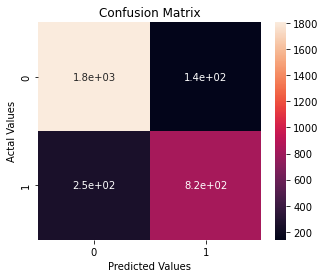

In [20]:
#model1.fit(X1_train, y1_train)  

#y2_pred=(voting.predict(x2_test) > 0.5).astype("int32")
y2_pred = voting.predict(X2_test)
cm = confusion_matrix(y2_test, y2_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [21]:
print(sklearn.metrics.classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1945
           1       0.86      0.77      0.81      1074

    accuracy                           0.87      3019
   macro avg       0.87      0.85      0.86      3019
weighted avg       0.87      0.87      0.87      3019



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [23]:
#!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt
import matplotlib.pyplot as plt

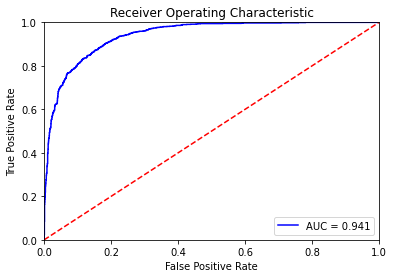

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = voting.predict_proba(X2_test)
#(voting.predict(x2_test) > 0.5).astype("int32")
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [25]:
from sklearn.metrics import balanced_accuracy_score

print("balanced_accuracy", balanced_accuracy_score(y2_test, y2_pred))

balanced_accuracy 0.8481370845361023


Model1: f1=0.809 auc=0.896


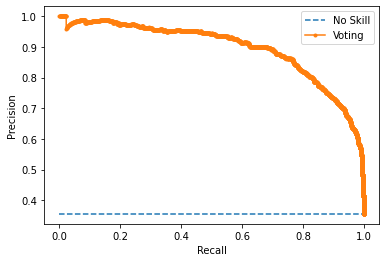

In [26]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = voting.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = voting.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Voting')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 2. Bagging and Pasting in Ensemble Learning

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=250,
    max_samples=100, bootstrap=True, random_state=101)

In [29]:
bagging_clf.fit(X2_train, y2_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=250, random_state=101)

In [30]:
y_pred = bagging_clf.predict(X2_test)
print(accuracy_score(y2_test, y_pred))

0.725405763497847


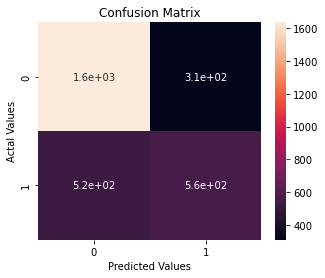

In [31]:
#model1.fit(X1_train, y1_train)  

y_pred = bagging_clf.predict(X2_test)

cm = confusion_matrix(y2_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [32]:
print(sklearn.metrics.classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1945
           1       0.64      0.52      0.57      1074

    accuracy                           0.73      3019
   macro avg       0.70      0.68      0.69      3019
weighted avg       0.72      0.73      0.72      3019



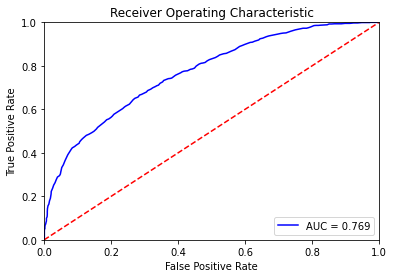

In [33]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = bagging_clf.predict_proba(X2_test)
#(voting.predict(x2_test) > 0.5).astype("int32")
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [34]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y_pred))

balanced_accuracy 0.6786883715586449


Model1: f1=0.572 auc=0.671


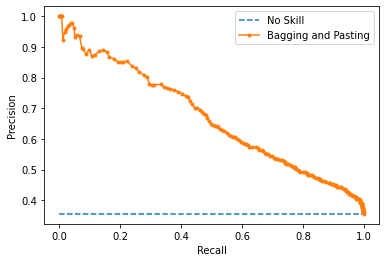

In [35]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = bagging_clf.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = bagging_clf.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Bagging and Pasting')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 3. Random Forests

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42,n_jobs=-1)
random_forest_clf.fit(X2_train, y2_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [37]:
y_pred_random_forest = random_forest_clf.predict(X2_test)

In [38]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16),
    n_estimators=500, random_state=101)

In [39]:
bagging_clf.fit(X2_train, y2_train)
y_pred_bagging = bagging_clf.predict(X2_test)

In [40]:
np.sum(y_pred_bagging == y_pred_random_forest) / len(y_pred_bagging)

0.8867174561112952

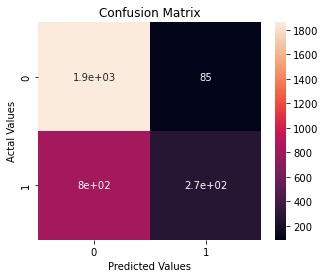

In [41]:
#model1.fit(X1_train, y1_train)  

y_pred = random_forest_clf.predict(X2_test)

cm = confusion_matrix(y2_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [42]:
print(sklearn.metrics.classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81      1945
           1       0.76      0.25      0.38      1074

    accuracy                           0.71      3019
   macro avg       0.73      0.60      0.59      3019
weighted avg       0.72      0.71      0.65      3019



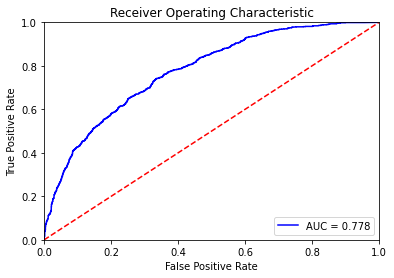

In [43]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = random_forest_clf.predict_proba(X2_test)
#(voting.predict(x2_test) > 0.5).astype("int32")
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y_pred))

balanced_accuracy 0.6043129736276467


Model1: f1=0.379 auc=0.656


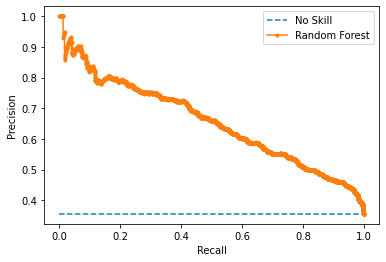

In [45]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = random_forest_clf.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = random_forest_clf.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 4. Boosting

## 4.1 AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
adaboost_clf.fit(X2_train, y2_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [48]:
y_pred = adaboost_clf.predict(X2_test)
accuracy_score(y2_test, y_pred)

0.8025836369658828

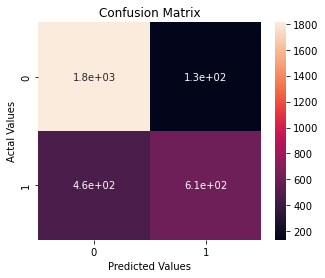

In [49]:
#model1.fit(X1_train, y1_train)  

y_pred = adaboost_clf.predict(X2_test)

cm = confusion_matrix(y2_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [50]:
print(sklearn.metrics.classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1945
           1       0.82      0.57      0.67      1074

    accuracy                           0.80      3019
   macro avg       0.81      0.75      0.77      3019
weighted avg       0.81      0.80      0.79      3019



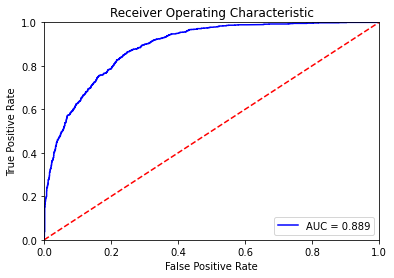

In [51]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = adaboost_clf.predict_proba(X2_test)
#(voting.predict(x2_test) > 0.5).astype("int32")
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y_pred))

balanced_accuracy 0.7504689003461102


Model1: f1=0.673 auc=0.813


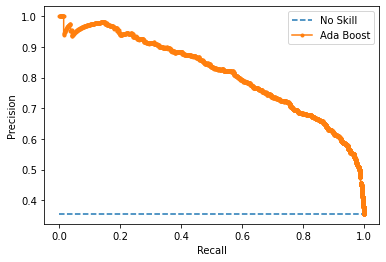

In [54]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = adaboost_clf.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = adaboost_clf.predict(X2_test)
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Ada Boost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 4.2 Gradient Boosting

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
tree_reg_first = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_first.fit(X2_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [57]:
y2 = y2_train - tree_reg_first.predict(X2_train)
tree_reg_second = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_second.fit(X2_train, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [58]:
y3 = y2_train - tree_reg_second.predict(X2_train)
tree_reg_third = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_third.fit(X2_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [59]:
y_pred = sum(tree.predict(X2_test) for tree in (tree_reg_first, tree_reg_second, tree_reg_third))

In [60]:
y_pred

array([0.83290803, 0.3524563 , 0.3524563 , ..., 0.3524563 , 0.71150774,
       0.3524563 ])

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X2_train, y2_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [63]:
y_pred=gbrt.predict(X2_test)

In [64]:
y_pred=(gbrt.predict(X2_test) > 0.5).astype("int32")
accuracy_score(y2_test, y_pred)

0.7151374627360053

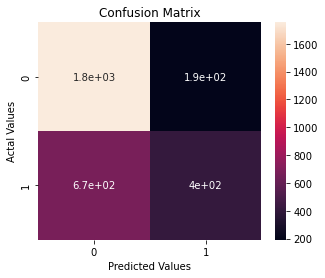

In [65]:
#model1.fit(X1_train, y1_train)  

y_pred=(gbrt.predict(X2_test) > 0.5).astype("int32")

cm = confusion_matrix(y2_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
#print(cm)

In [66]:
print(sklearn.metrics.classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1945
           1       0.68      0.38      0.49      1074

    accuracy                           0.72      3019
   macro avg       0.70      0.64      0.64      3019
weighted avg       0.71      0.72      0.69      3019



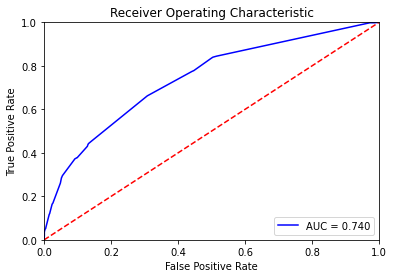

In [67]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gbrt.predict(X2_test)
#(voting.predict(x2_test) > 0.5).astype("int32")
#print(probs)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
print("balanced_accuracy", balanced_accuracy_score(y2_test, y_pred))

balanced_accuracy 0.6394472289641109


Model1: f1=0.485 auc=0.631


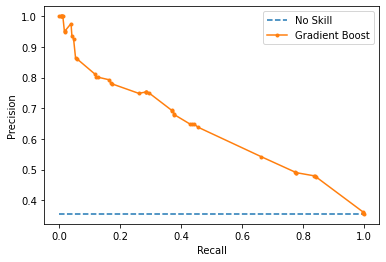

In [69]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = gbrt.predict(X2_test)
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# predict class values
#yhat = gbrt.predict(X2_test)
yhat=(gbrt.predict(X2_test) > 0.5).astype("int32")
lr_precision, lr_recall, _ = precision_recall_curve(y2_test, lr_probs)
lr_f1, lr_auc = f1_score(y2_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Model1: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y2_test[y2_test==1]) / len(y2_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Gradient Boost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()